# Etapa 5: classificar os dados resultantes das etapas anteriores aplicando os modelos Dummy, SVC, Guassian Naive Bayes, Árvore de Decisão.


## Hipótese: "Há relação entre a quantidade de pessoas infectadas pelo vírus HIV com os indicadores socioeconômicos de um país, em um determinado ano."
Lista de indicadores:
- PIB;
- Quantidade de usuários de internet (acesso à informação);
- Crescimento populacional;
- Desemprego;
- Gastos do governo com educação;
- Analfabetismo entre 15 e 24 anos;
- Analfabetismo entre 25 e 64 anos;
- Quantidade de professores no ensino fundamental;
- Taxa de crianças fora da escola no ensino fundamental
- Proporção de alunos por professor no ensino fundamental; e
- Taxa de alunos que ingressaram no ensino fundamental

## 1. Instalando e importando as bibliotecas utlizadas nesse notebook.

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install sklearn
!pip3 install graphviz
#!apt-get install graphviz

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import export_graphviz
import graphviz

## 2. Carga dos dados resultantes das etapas de extração  e transformação.

In [3]:
df_indicadores_em_colunas = pd.read_csv('../data/final_transformacao_dados_unificados_aids_indicadores.csv')

df_indicadores_em_colunas.head()

,AIDS,PIB,Usuários Internet,Crescimento Populacional,Desemprego,Investimentos Educação,Analfabetismo 15 e 24,Analfabetismo 25 e 64,Qtd Professores EF,Crianças Fora Escola,Qtd Alunos por professor,Qtd Alunos EF
0,1.0,1.593680e+10,4.00,2.81,8.1,3.46,2947366.0,6844551.6,118858.0,8.97,44.42,91.03
1,1.0,1.793024e+10,5.00,3.10,8.2,3.44,2947366.0,6844551.6,121593.0,8.97,43.52,91.03
2,1.0,2.053654e+10,5.45,3.27,8.0,2.53,2947366.0,6844551.6,129093.0,8.97,44.68,91.03
3,1.0,2.004633e+10,5.90,3.32,8.4,3.48,2947366.0,6844551.6,130957.0,8.97,45.71,91.03
4,1.0,2.005019e+10,7.00,3.18,8.6,3.78,2947366.0,6844551.6,130957.0,8.97,45.71,91.03


## 3. Aplicação dos classificadores Dummy, SVC, Gaussian Naive Bayes e Decision Tree Classifier.

#### A função "classificar" objetiva analisar o resultado de um modelo de classificação. Além disso, imprime a matriz de confusão e o relatório da classificação.

In [4]:
def classificar(modelo, treino_x, teste_x, treino_y, teste_y, nome_modelo):
    modelo.fit(treino_x, treino_y)
    print("*********  " + nome_modelo + "  *********")
    print("Acurácia treinamento: %.2f%%" % (modelo.score(treino_x, treino_y)*100))
    previsoes = modelo.predict(teste_x)
    print("Acurácia previsão: %.2f%%" % (accuracy_score(teste_y, previsoes)*100))
    print("")
    print("<< Matriz de confusão >>")
    matriz_confusao = confusion_matrix(teste_y, previsoes)
    print(pd.crosstab(teste_y, previsoes, rownames=['Real'], colnames=['Predito'], margins=True))
    print("")
    print("<< Relatório de classificação >>")
    print(classification_report(teste_y, previsoes))

#### Aplicação do "Dummy Classifier".

In [5]:
x = df_indicadores_em_colunas[['PIB', 'Usuários Internet', 'Crescimento Populacional', 
                               'Desemprego', 'Investimentos Educação', 'Analfabetismo 15 e 24', 
                               'Analfabetismo 25 e 64', 'Qtd Professores EF', 'Crianças Fora Escola',
                               'Qtd Alunos por professor', 'Qtd Alunos EF']]

y = df_indicadores_em_colunas['AIDS']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 5
np.random.seed(SEED)

treino_x_bruto_dm, teste_x_bruto_dm, treino_y_dm, teste_y_dm = train_test_split(x, y, random_state = SEED, test_size=0.3, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

classificar(DummyClassifier(strategy='stratified'), treino_x_bruto_dm, teste_x_bruto_dm, treino_y_dm, teste_y_dm, "Dummy")

*********  Dummy  *********
Acurácia treinamento: 68.06%
Acurácia previsão: 72.04%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      129   21  150
1.0       31    5   36
All      160   26  186

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       150
         1.0       0.19      0.14      0.16        36

    accuracy                           0.72       186
   macro avg       0.50      0.50      0.50       186
weighted avg       0.69      0.72      0.70       186



#### Aplicação do "SVC".

In [6]:
# Utilização do modelo "SVC"

x = df_indicadores_em_colunas[['PIB', 'Usuários Internet', 'Crescimento Populacional', 
                               'Desemprego', 'Investimentos Educação', 'Analfabetismo 15 e 24', 
                               'Analfabetismo 25 e 64', 'Qtd Professores EF', 'Crianças Fora Escola',
                               'Qtd Alunos por professor', 'Qtd Alunos EF']]

y = df_indicadores_em_colunas['AIDS']

#Define a ordem dos números aleatórios e retira a aleatoriedade da separação dos dados de treino e teste.
SEED = 5
np.random.seed(SEED)

treino_x_bruto_svc, teste_x_bruto_svc, treino_y_svc, teste_y_svc = train_test_split(x, y, random_state = SEED, test_size=0.3, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

#Reescalando os dados para uma faixa similar a todos.
scaler = StandardScaler()
scaler.fit(treino_x_bruto_svc)
treino_x = scaler.transform(treino_x_bruto_svc)
teste_x = scaler.transform(teste_x_bruto_svc)

classificar(SVC(), treino_x_bruto_svc, teste_x_bruto_svc, treino_y_svc, teste_y_svc, "SVC")

*********  SVC  *********
Acurácia treinamento: 80.79%
Acurácia previsão: 80.65%

<< Matriz de confusão >>
Predito  0.0  All
Real             
0.0      150  150
1.0       36   36
All      186  186

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       150
         1.0       0.00      0.00      0.00        36

    accuracy                           0.81       186
   macro avg       0.40      0.50      0.45       186
weighted avg       0.65      0.81      0.72       186



/home/joca/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Aplicação do "Gaussian Naive Bayes".

In [7]:
x = df_indicadores_em_colunas[['PIB', 'Usuários Internet', 'Crescimento Populacional', 
                               'Desemprego', 'Investimentos Educação', 'Analfabetismo 15 e 24', 
                               'Analfabetismo 25 e 64', 'Qtd Professores EF', 'Crianças Fora Escola',
                               'Qtd Alunos por professor', 'Qtd Alunos EF']]

y = df_indicadores_em_colunas['AIDS']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 20
np.random.seed(SEED)

treino_x_bruto_nb, teste_x_bruto_nb, treino_y_nb, teste_y_nb = train_test_split(x, y, random_state = SEED, test_size=0.3, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

classificar(GaussianNB(), treino_x_bruto_nb, teste_x_bruto_nb, treino_y_nb, teste_y_nb, "Gaussian Naive Bayes")

*********  Gaussian Naive Bayes  *********
Acurácia treinamento: 80.09%
Acurácia previsão: 80.11%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      149    1  150
1.0       36    0   36
All      185    1  186

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89       150
         1.0       0.00      0.00      0.00        36

    accuracy                           0.80       186
   macro avg       0.40      0.50      0.44       186
weighted avg       0.65      0.80      0.72       186



#### Aplicação do "Decision Tree Classifier". Além disso, é exibido um gráfico para a análise das decisões tomadas pelo algoritmo.

*********  DecisionTreeClassifier  *********
Acurácia treinamento: 88.66%
Acurácia previsão: 82.26%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      137   13  150
1.0       20   16   36
All      157   29  186

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       150
         1.0       0.55      0.44      0.49        36

    accuracy                           0.82       186
   macro avg       0.71      0.68      0.69       186
weighted avg       0.81      0.82      0.82       186



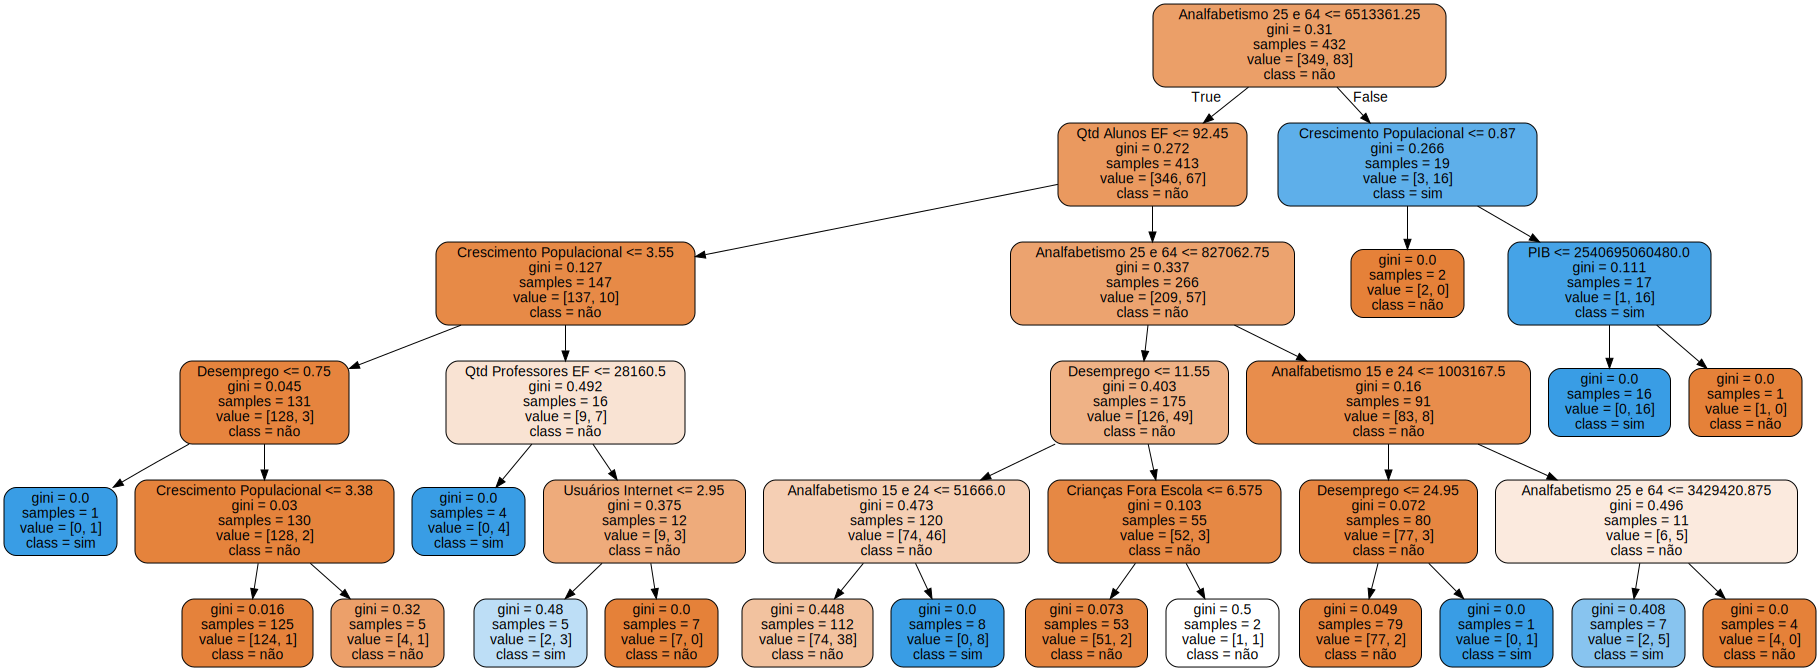

In [8]:
x = df_indicadores_em_colunas[['PIB', 'Usuários Internet', 'Crescimento Populacional', 
                               'Desemprego', 'Investimentos Educação', 'Analfabetismo 15 e 24', 
                               'Analfabetismo 25 e 64', 'Qtd Professores EF', 'Crianças Fora Escola',
                               'Qtd Alunos por professor', 'Qtd Alunos EF']]

y = df_indicadores_em_colunas['AIDS']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 20
np.random.seed(SEED)

treino_x_bruto_dtc, teste_x_bruto_dtc, treino_y_dtc, teste_y_dtc = train_test_split(x, y, random_state = SEED, test_size=0.3, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

modelo = DecisionTreeClassifier(max_depth=5)

classificar(DecisionTreeClassifier(max_depth=5), treino_x_bruto_dtc, teste_x_bruto_dtc, treino_y_dtc, teste_y_dtc, "DecisionTreeClassifier")

modelo.fit(treino_x_bruto_dtc, treino_y_dtc)
previsoes = modelo.predict(teste_x_bruto_dtc)
acuracia = accuracy_score(teste_y_dtc, previsoes)
features = x.columns
dados_dot = export_graphviz(modelo, feature_names=features, rounded=True, filled=True, class_names=['não', 'sim'])
imagem = graphviz.Source(dados_dot)
imagem